# induce-vary-alignments

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import pandas as pd

from induction import *

## Load split statistics

In [3]:
experiment = 'induce-vary-alignments'
conditions = ['none', 'jamr', 'tamr', 'amr_ud', 'isi',
              'jamr+isi-vote1', 'jamr+isi-vote2',
              'tamr+amr_ud-vote1', 'tamr+amr_ud-vote2',
              'tamr+isi-vote1', 'tamr+isi-vote2',
              'amr_ud+isi-vote1', 'amr_ud+isi-vote2',
              'jamr+tamr+amr_ud-vote1', 'jamr+tamr+amr_ud-vote2', 'jamr+tamr+amr_ud-vote3',
              'jamr+tamr+isi-vote1', 'jamr+tamr+isi-vote2', 'jamr+tamr+isi-vote3',
              'jamr+amr_ud+isi-vote1', 'jamr+amr_ud+isi-vote2', 'jamr+amr_ud+isi-vote3',
              'tamr+amr_ud+isi-vote1', 'tamr+amr_ud+isi-vote2', 'tamr+amr_ud+isi-vote3',
              'jamr+tamr+amr_ud+isi-vote1', 'jamr+tamr+amr_ud+isi-vote2', 'jamr+tamr+amr_ud+isi-vote3']

In [4]:
# stats dictionary holds the table for each condition in 'gold', 'jamr', 'isi', 'jamr+isi'
stats = {}
# Load stats
for condition in conditions:
    table = load_stats_table(experiment, condition)
    if table is not None:
        stats[condition] = table
# Holds the stats for the best derivation of a sentence
best = {condition: best_derivation_only(stats[condition]) for condition in stats.keys()}

[Errno 2] No such file or directory: '../induce-vary-alignments/output/none/split1_stats.csv'


## Load stats from log file

In [5]:
log_stats = load_log_stats(experiment, conditions)

In [6]:
log_stats

condition  split1_seconds  \
none                                              none             NaN   
jamr                                              jamr          1464.0   
tamr                                              tamr          1319.0   
amr_ud                                          amr_ud         10542.0   
isi                                                isi          1165.0   
jamr+isi-vote1                          jamr+isi-vote1          1293.0   
jamr+isi-vote2                          jamr+isi-vote2          2400.0   
tamr+amr_ud-vote1                    tamr+amr_ud-vote1          1825.0   
tamr+amr_ud-vote2                    tamr+amr_ud-vote2         10825.0   
tamr+isi-vote1                          tamr+isi-vote1          1306.0   
tamr+isi-vote2                          tamr+isi-vote2          2315.0   
amr_ud+isi-vote1                      amr_ud+isi-vote1          1282.0   
amr_ud+isi-vote2                      amr_ud+isi-vote2         10856.0   
jamr+tamr+amr_ud-vote1          jamr+tamr+amr_ud-vote1          2180.0   
jamr+tamr+amr_ud-vote2          jamr+tamr+amr_ud-vote2          2188.0   
jamr+tamr+amr_ud-vote3          jamr+tamr+amr_ud-vote3         10723.0   
jamr+tamr+isi-vote1                jamr+tamr+isi-vote1          1557.0   
jamr+tamr+isi-vote2                jamr+tamr+isi-vote2          1481.0   
jamr+tamr+isi-vote3                jamr+tamr+isi-vote3          2862.0   
jamr+amr_ud+isi-vote1            jamr+amr_ud+isi-vote1          1625.0   
jamr+amr_ud+isi-vote2            jamr+amr_ud+isi-vote2          1662.0   
jamr+amr_ud+isi-vote3            jamr+amr_ud+isi-vote3         11378.0   
tamr+amr_ud+isi-vote1            tamr+amr_ud+isi-vote1          1620.0   
tamr+amr_ud+isi-vote2            tamr+amr_ud+isi-vote2          1908.0   
tamr+amr_ud+isi-vote3            tamr+amr_ud+isi-vote3         11102.0   
jamr+tamr+amr_ud+isi-vote1  jamr+tamr+amr_ud+isi-vote1          2039.0   
jamr+tamr+amr_ud+isi-vote2  jamr+tamr+amr_ud+isi-vote2          1568.0   
jamr+tamr+amr_ud+isi-vote3  jamr+tamr+amr_ud+isi-vote3          1939.0   

                            lexentry_count  
none                                   NaN  
jamr                              436152.0  
tamr                              424010.0  
amr_ud                           1032628.0  
isi                               271157.0  
jamr+isi-vote1                    408183.0  
jamr+isi-vote2                    431642.0  
tamr+amr_ud-vote1                 516610.0  
tamr+amr_ud-vote2                1065465.0  
tamr+isi-vote1                    427220.0  
tamr+isi-vote2                    444605.0  
amr_ud+isi-vote1                  285033.0  
amr_ud+isi-vote2                 1074378.0  
jamr+tamr+amr_ud-vote1            548702.0  
jamr+tamr+amr_ud-vote2            541744.0  
jamr+tamr+amr_ud-vote3           1091032.0  
jamr+tamr+isi-vote1               478453.0  
jamr+tamr+isi-vote2               467932.0  
jamr+tamr+isi-vote3               485152.0  
jamr+amr_ud+isi-vote1             480677.0  
jamr+amr_ud+isi-vote2             326847.0  
jamr+amr_ud+isi-vote3            1124947.0  
tamr+amr_ud+isi-vote1             499549.0  
tamr+amr_ud+isi-vote2             352937.0  
tamr+amr_ud+isi-vote3            1116933.0  
jamr+tamr+amr_ud+isi-vote1        538640.0  
jamr+tamr+amr_ud+isi-vote2        470735.0  
jamr+tamr+amr_ud+isi-vote3        371928.0

# Reports

In [7]:
# The set of aligners we wish to analyse.
cov_table_aligners = ['none', 'jamr', 'tamr', 'amr_ud', 'isi', 'jamr+tamr+amr_ud', 'jamr+tamr+isi', 'jamr+amr_ud+isi', 'tamr+amr_ud+isi', 'jamr+tamr+amr_ud+isi']

## Results table

First, we collect all relevant performance data in a single DF containing all conditions we wish to analyse.

In [8]:
# Extract information from the condition name
# Returns pair of aligners, merge_strategy
def parse_condition(condition):
    if '-' not in condition:
        if '+' in condition:
            return condition, 'm-i'
        else:
            return condition, None
    return condition.split('-')

def gen_results():
    for condition in best.keys():
        table = best[condition]
        aligners, merge_strategy = parse_condition(condition)
        yield {
            'Condition': condition,
            'Aligners': aligners,
            'Merge Strategy': merge_strategy,
            'Token Cov.': token_coverage(table),
            'Lexicon Size': log_stats.at[condition, 'lexentry_count'],
            'Runtime': log_stats.at[condition, 'split1_seconds']
        }

aligner_stats_df = pd.DataFrame(gen_results()).set_index('Condition')
aligner_stats_df = aligner_stats_df[aligner_stats_df['Aligners'].isin(cov_table_aligners)]
aligner_stats_df

Aligners Merge Strategy  Token Cov.  \
Condition                                                                     
jamr                                        jamr           None    0.590503   
tamr                                        tamr           None    0.610542   
amr_ud                                    amr_ud           None    0.358370   
isi                                          isi           None    0.573782   
jamr+tamr+amr_ud-vote1          jamr+tamr+amr_ud          vote1    0.653402   
jamr+tamr+amr_ud-vote2          jamr+tamr+amr_ud          vote2    0.631627   
jamr+tamr+amr_ud-vote3          jamr+tamr+amr_ud          vote3    0.347352   
jamr+tamr+isi-vote1                jamr+tamr+isi          vote1    0.640916   
jamr+tamr+isi-vote2                jamr+tamr+isi          vote2    0.635205   
jamr+tamr+isi-vote3                jamr+tamr+isi          vote3    0.559836   
jamr+amr_ud+isi-vote1            jamr+amr_ud+isi          vote1    0.644567   
jamr+amr_ud+isi-vote2            jamr+amr_ud+isi          vote2    0.564582   
jamr+amr_ud+isi-vote3            jamr+amr_ud+isi          vote3    0.348042   
tamr+amr_ud+isi-vote1            tamr+amr_ud+isi          vote1    0.659755   
tamr+amr_ud+isi-vote2            tamr+amr_ud+isi          vote2    0.578464   
tamr+amr_ud+isi-vote3            tamr+amr_ud+isi          vote3    0.358370   
jamr+tamr+amr_ud+isi-vote1  jamr+tamr+amr_ud+isi          vote1    0.662253   
jamr+tamr+amr_ud+isi-vote2  jamr+tamr+amr_ud+isi          vote2    0.643667   
jamr+tamr+amr_ud+isi-vote3  jamr+tamr+amr_ud+isi          vote3    0.557224   

                            Lexicon Size  Runtime  
Condition                                          
jamr                            436152.0   1464.0  
tamr                            424010.0   1319.0  
amr_ud                         1032628.0  10542.0  
isi                             271157.0   1165.0  
jamr+tamr+amr_ud-vote1          548702.0   2180.0  
jamr+tamr+amr_ud-vote2          541744.0   2188.0  
jamr+tamr+amr_ud-vote3         1091032.0  10723.0  
jamr+tamr+isi-vote1             478453.0   1557.0  
jamr+tamr+isi-vote2             467932.0   1481.0  
jamr+tamr+isi-vote3             485152.0   2862.0  
jamr+amr_ud+isi-vote1           480677.0   1625.0  
jamr+amr_ud+isi-vote2           326847.0   1662.0  
jamr+amr_ud+isi-vote3          1124947.0  11378.0  
tamr+amr_ud+isi-vote1           499549.0   1620.0  
tamr+amr_ud+isi-vote2           352937.0   1908.0  
tamr+amr_ud+isi-vote3          1116933.0  11102.0  
jamr+tamr+amr_ud+isi-vote1      538640.0   2039.0  
jamr+tamr+amr_ud+isi-vote2      470735.0   1568.0  
jamr+tamr+amr_ud+isi-vote3      371928.0   1939.0

Assemble the token coverage in a 2D table so the effect of merge strategy and aligner combination can be separated.

In [9]:
aligner_cov_df = pd.DataFrame(columns=['vote1', 'vote2', 'vote3'], index=cov_table_aligners)
src = aligner_stats_df
for aligners in cov_table_aligners:
    if '+' in aligners:
        for strategy in ['vote1', 'vote2', 'vote3', 'vote4']:
            try:
                coverage = src[(src['Aligners'] == aligners) & (src['Merge Strategy'] == strategy)]['Token Cov.'].iloc[0]
            except IndexError:
                coverage = 'dnf'
            aligner_cov_df.loc[aligners, strategy] = coverage
    else:
        try:
            coverage = src[src['Aligners'] == aligners]['Token Cov.'].iloc[0]
        except IndexError:
            coverage = 'n/a'
        aligner_cov_df.loc[aligners, 'vote1'] = coverage
aligner_cov_df

vote1     vote2     vote3 vote4
none                       n/a       NaN       NaN   NaN
jamr                  0.590503       NaN       NaN   NaN
tamr                  0.610542       NaN       NaN   NaN
amr_ud                 0.35837       NaN       NaN   NaN
isi                   0.573782       NaN       NaN   NaN
jamr+tamr+amr_ud      0.653402  0.631627  0.347352   dnf
jamr+tamr+isi         0.640916  0.635205  0.559836   dnf
jamr+amr_ud+isi       0.644567  0.564582  0.348042   dnf
tamr+amr_ud+isi       0.659755  0.578464   0.35837   dnf
jamr+tamr+amr_ud+isi  0.662253  0.643667  0.557224   dnf

In [10]:
# Save as a LaTeX table

with open('induction-vary-alignments-coverages.tex', 'w') as f:
    df = aligner_cov_df
    print(
r'''\documentclass{standalone}
\usepackage{booktabs}

\begin{document}
\begin{tabular}{lrrr}
  \toprule
   & \textbf{vote1} & \textbf{vote2} & \textbf{vote3}\\
  \midrule''', file=f)
    for aligners in cov_table_aligners:
        aligners_fmt = r'\textbf{' + aligners.replace('_', r'\_') + '}'
        f.write(f'  {aligners_fmt} ')
        for vote in [1, 2, 3]:
            try:
                vote_str = f'vote{vote}'
                coverage = df.at[aligners, vote_str]
                if isinstance(coverage, float) and np.isnan(coverage):
                    coverage = '--'
                f.write(f' &{coverage:.4} ')
            except IndexError:
                f.write(f' &dnf ')
        f.write('\\\\\n')
    print(
r'''  \bottomrule
\end{tabular}
\end{document}''', file=f)

## Compare aligner runtimes

While isi performs best in terms of coverage, jamr+isi is much faster. The following chart shows this.

In [11]:
from plotnine import *

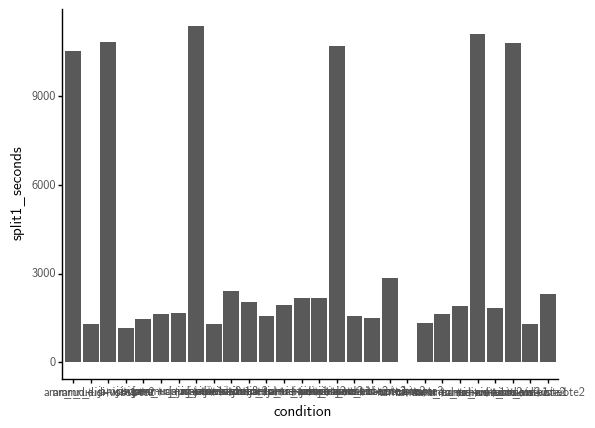

<ggplot: (8755442902557)>

In [12]:
aligner_runtime_stats = log_stats
aligner_runtime_plot = (ggplot(aligner_runtime_stats, aes(x='condition', y='split1_seconds')) + geom_col() + theme_classic(base_family='CMU Sans Serif'))
aligner_runtime_plot

In [13]:
aligner_runtime_plot.save('AlignerRuntimes.svg')

# Various other statistics

## Relation between lexicon size and runtime

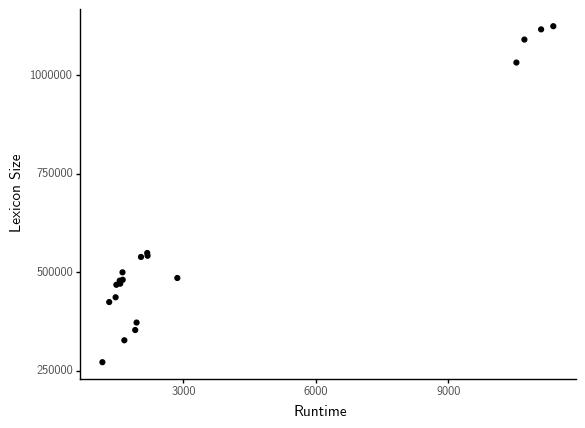

<ggplot: (8755398881361)>

In [14]:
size_time_plot = (ggplot(aligner_stats_df, aes(y='Lexicon Size', x='Runtime')) + geom_point() + theme_classic(base_family='CMU Sans Serif'))
size_time_plot

## Distribution of dropped tokens

How are the dropped tokens distributed across the sentences? We graph the number of sentences that have at most x dropped tokens.

In [15]:
# Max number of dropped tokens in any sentence in any condition: determines how wide the x axis is
max_dropped = int(max(best[condition]['dropped'].max() for condition in best.keys()))
max_dropped

95

In [16]:
dropped_plot_conditions = ['jamr+tamr+amr_ud-vote1', 'jamr+tamr+isi-vote1', 'jamr+amr_ud+isi-vote1', 'jamr+tamr+amr_ud+isi-vote1']

In [17]:
def sentences_below_droppage(table, droppage):
    return len(table[table['dropped'] <= droppage])

data = {k: v for k, v in best.items() if k in dropped_plot_conditions}
dropped_counts_cumulative = pd.concat([pd.DataFrame({'Dropped Tokens': np.arange(max_dropped + 1), 'Condition': condition, 'Sentences (cumulative)': np.array([sentences_below_droppage(table, i) for i in range(max_dropped + 1)])}) for condition, table in data.items()])

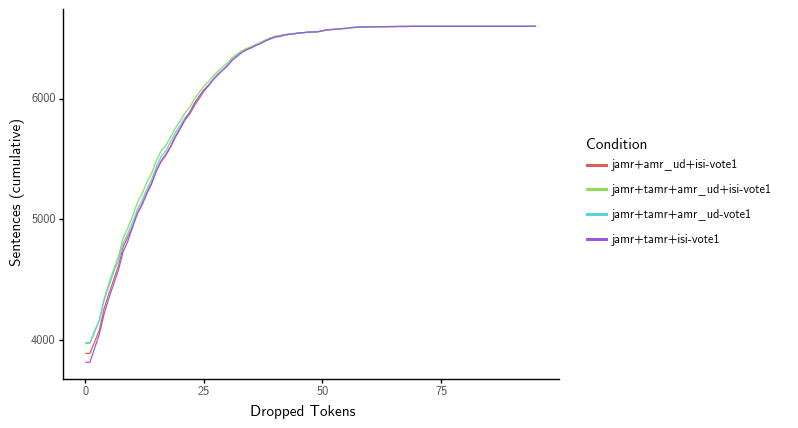

<ggplot: (8755402552049)>

In [18]:
p = (ggplot(dropped_counts_cumulative, aes(y='Sentences (cumulative)', x='Dropped Tokens', colour='Condition')) + geom_line() + theme_classic(base_family='CMU Sans Serif'))
p